In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
DpM_Raw_data=pd.read_csv("Resources/DpM_Data/API_SP.DYN.CDRT.IN_DS2_es_csv_v2_1562579.csv",delimiter=",")

In [3]:
DpM_Raw_data=DpM_Raw_data.set_index("Country Name")

In [4]:
DpM_Mundo=DpM_Raw_data.loc["Mundo"]
#DpM_Mundo_df=DpM_Mundo[["Country Code","1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018"]]

In [5]:
DpM_Mundo_df=pd.DataFrame(DpM_Mundo[3:62]).reset_index()

In [6]:
DpM_Mundo_df.shape

(59, 2)

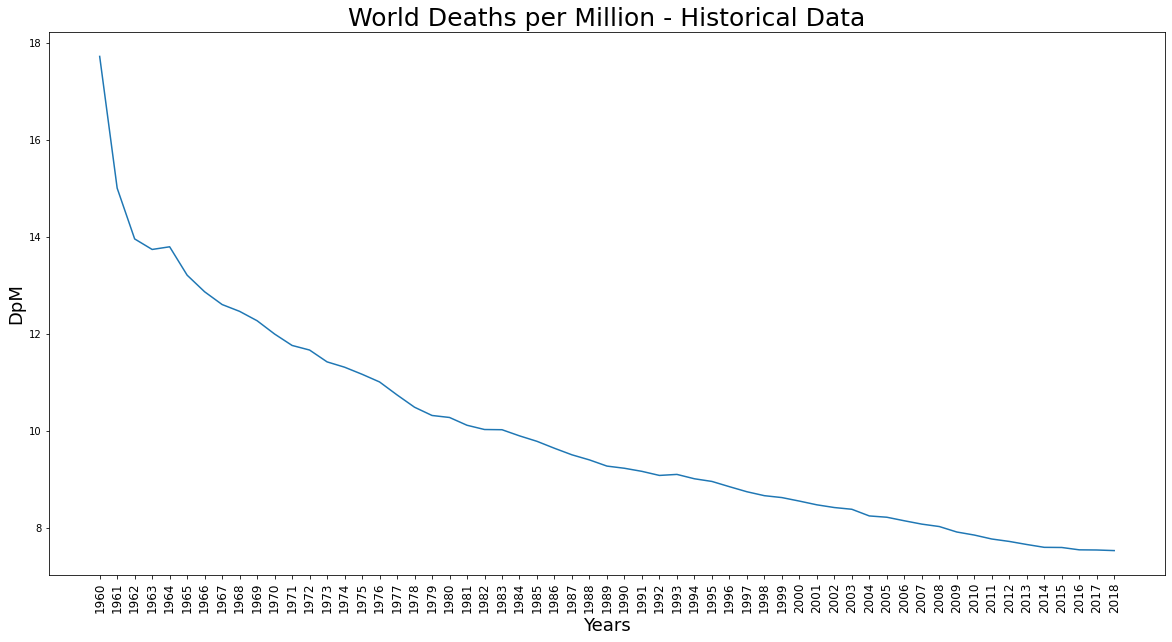

In [7]:
plt.figure(figsize=(20,10))
plt.plot(DpM_Mundo_df["index"],DpM_Mundo_df["Mundo"])
plt.title("World Deaths per Million - Historical Data",fontsize=25)
plt.xlabel("Years",fontsize=18)
plt.ylabel("DpM",fontsize=18)
plt.xticks(rotation="vertical",fontsize=12)
plt.show()

In [8]:
def linear_regression(x,y,title,x_label,y_label):
    from scipy.stats import linregress
    (slope,intercept,rvalue,pvalue,stderr)=linregress(x,y)
    regress_values=x*slope+intercept
    line_eq=f"y = x * {str(round(slope,2))} + {str(round(intercept,2))}" 
    plt.figure(figsize=(20,10))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,xycoords="axes points",xy=(10,10),fontsize=18,color="red")
    print(f"The r-squared is: {rvalue**2}")
    plt.title(title,fontsize=25)
    plt.xlabel(x_label,fontsize=18)
    plt.ylabel(y_label,fontsize=18)
    plt.xticks(x,rotation="vertical",fontsize=12)
    plt.show()
    return slope,intercept

In [9]:
DpM_Mundo_df.dtypes

index    object
Mundo    object
dtype: object

In [10]:
DpM_Mundo_df["index"]=DpM_Mundo_df["index"].astype(float)
DpM_Mundo_df["Mundo"]=DpM_Mundo_df["Mundo"].astype(float)

In [11]:
DpM_Mundo_new=DpM_Mundo_df.loc[DpM_Mundo_df["index"]>=1980]

The r-squared is: 0.9875580798440812


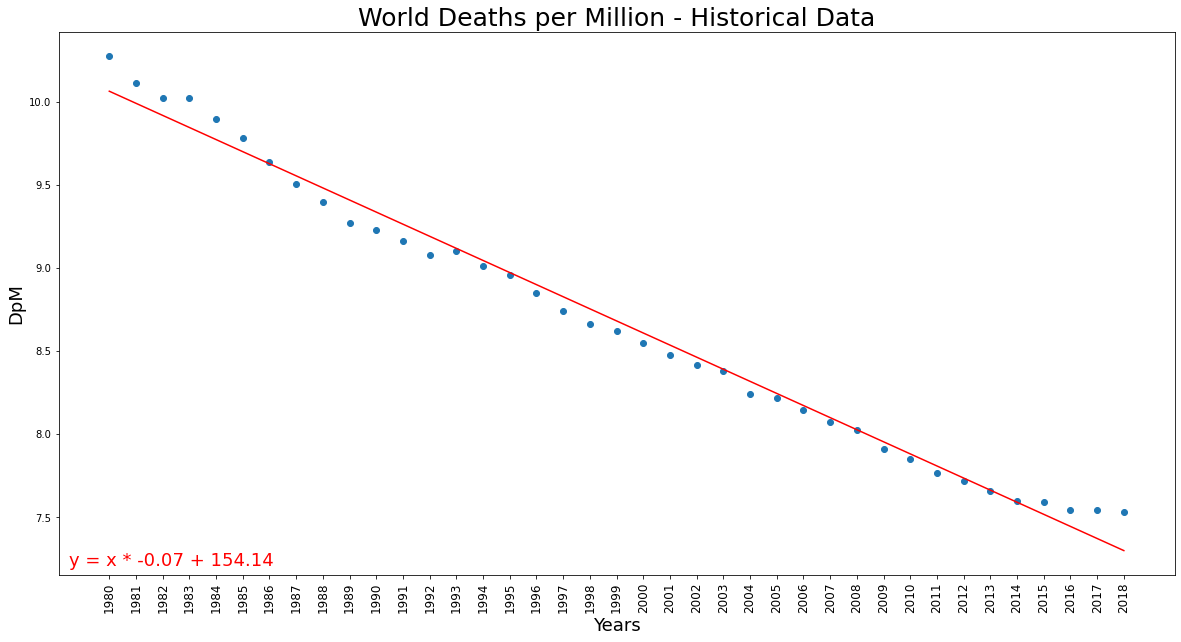

In [12]:
m,b=linear_regression(DpM_Mundo_new["index"],DpM_Mundo_new["Mundo"],"World Deaths per Million - Historical Data","Years","DpM")

In [30]:
DpM_2019=2018*(m)+b
DpM_2020=2020*(m)+b
print(f"The expected Deaths per Million Habitants in the World for 2019 is {str(round(DpM_2019,2))} and for 2020 is {str(round(DpM_2020,2))}")

The expected Deaths per Million Habitants in the World for 2019 is 7.3 and for 2020 is 7.15


In [14]:
DpM_Mundo_df.columns=["Año","DpM"]


In [15]:
dataJF = "Resources/datos.csv"
dataJF = pd.read_csv(dataJF)

In [16]:
datos_df =pd.DataFrame(dataJF)

In [17]:
total_df=pd.merge(datos_df,DpM_Mundo_df,on="Año",how="left")
total_df=total_df.fillna(0)
total_df.tail()

,Año,Population,GDPcons,GDPConsPPP,PC_GDPcons,PC_GDPConsPPP,Growth,FOOD,LIvestock,FOOD_PC,livestock_PC,DpM
41,2021,0,91031,139824,0,0,5.15,0,0,0,0,0.0
42,2022,0,96704,148208,0,0,4.19,0,0,0,0,0.0
43,2023,0,102252,156620,0,0,3.84,0,0,0,0,0.0
44,2024,0,107808,165339,0,0,3.63,0,0,0,0,0.0
45,2025,0,113482,174434,0,0,3.52,0,0,0,0,0.0


In [18]:
total_df.dtypes

Año                int64
Population         int64
GDPcons            int64
GDPConsPPP         int64
PC_GDPcons         int64
PC_GDPConsPPP      int64
Growth           float64
FOOD               int64
LIvestock          int64
FOOD_PC            int64
livestock_PC       int64
DpM              float64
dtype: object

In [19]:
total_dftot=total_df.loc[total_df["Año"]<=2018]

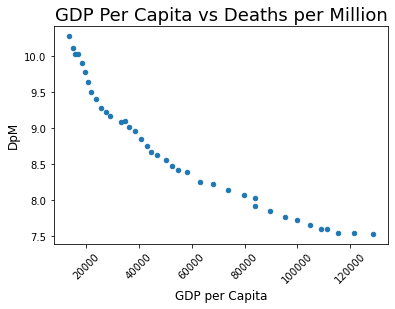

In [31]:
total_dftot.plot(kind="scatter",x="GDPConsPPP",y="DpM")
plt.title("GDP Per Capita vs Deaths per Million",fontsize=18)
plt.xlabel("GDP per Capita",fontsize=12)
plt.ylabel("DpM",fontsize=12)
plt.xticks(rotation=45,fontsize=10)
plt.show()

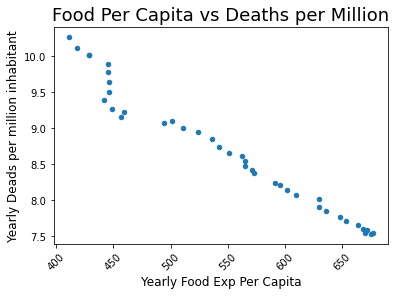

In [22]:
total_dftot.plot(kind="scatter",x="FOOD_PC",y="DpM")
plt.title("Food Per Capita vs Deaths per Million",fontsize=18)
plt.xlabel("Yearly Food Exp Per Capita",fontsize=12)
plt.ylabel("Yearly Deads per million inhabitant",fontsize=12)
plt.xticks(rotation=45,fontsize=10)
plt.show()

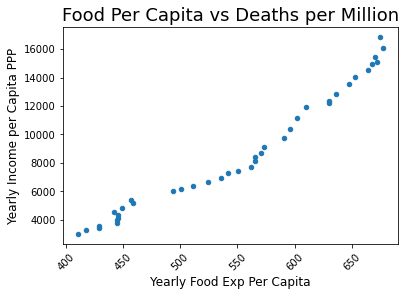

In [23]:
total_dftot.plot(kind="scatter",x="FOOD_PC",y="PC_GDPConsPPP")
plt.title("Food Per Capita vs Deaths per Million",fontsize=18)
plt.xlabel("Yearly Food Exp Per Capita",fontsize=12)
plt.ylabel("Yearly Income per Capita PPP",fontsize=12)
plt.xticks(rotation=45,fontsize=10)
plt.show()

In [24]:
# tareas
#encontrar via API la proyeccion de poblacion para 2020, 2021 y 2022

The r-squared is: 0.906053514327578


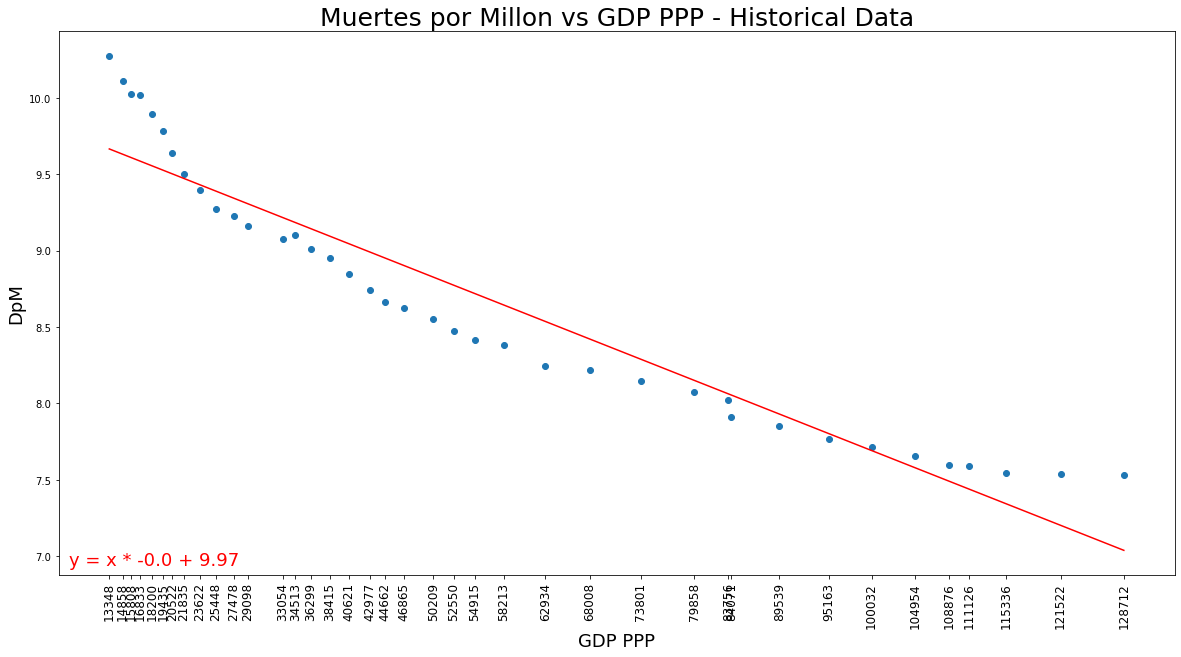

In [32]:
m,b=linear_regression(total_dftot["GDPConsPPP"],total_dftot["DpM"],"Muertes por Millon vs GDP PPP - Historical Data","GDP PPP","DpM")

In [ ]:
DpM_2019=2018*(m)+b
DpM_2020=2020*(m)+b
print(f"The expected Deaths per Million Habitants in the World for 2019 is {str(round(DpM_2019,2))} and for 2020 is {str(round(DpM_2020,2))}")